# Realtime Face Blurring

In [12]:
import cv2
import cvzone

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Loading Haar Cascade

In [4]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,
                                               scaleFactor=1.2,
                                              minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        
        crop = img[y:y+h,x:x+w]

        crop = cv2.blur(crop,(50,50))

        face_img[y:y + crop.shape[0] , x:x + crop.shape[1]] = crop
          
        
    return face_img

## Testing on single face

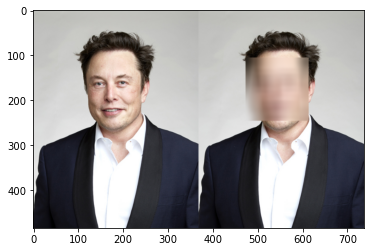

In [23]:
img = cv2.cvtColor(cv2.imread('./image.jpg'),cv2.COLOR_BGR2RGB)
blur_img = detect_face(img)
stackedImg = cvzone.stackImages([img,blur_img], 2, 0.8)
plt.imshow(stackedImg)

## Testing on Group Image

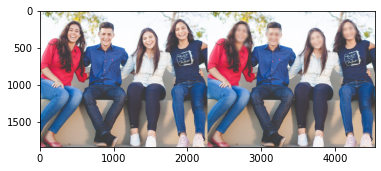

In [26]:
img = cv2.cvtColor(cv2.imread('./group.jpg'),cv2.COLOR_BGR2RGB)
blur_img = detect_face(img)
stackedImg = cvzone.stackImages([img,blur_img], 2, 0.8)
plt.imshow(stackedImg)

## Testing on Realtime Video

In [28]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Face Detection', frame)
    
    if cv2.waitKey(1) & 0xff==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()